### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.


# import

In [9]:
import pandas as pd 

In [11]:
df=pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\Coursera\\IBM\\Machine learning\\ChurnData.csv")

# explore

In [16]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [18]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

# selection

In [21]:
df=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn']]

In [23]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0.0


In [25]:
print(df.shape)
print(df.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')


In [27]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
churn       float64
dtype: object

In [29]:
df=df.astype('int')

In [31]:
df.dtypes

tenure      int32
age         int32
address     int32
income      int32
ed          int32
employ      int32
equip       int32
callcard    int32
wireless    int32
churn       int32
dtype: object

In [33]:
import numpy as np
X=np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11,  33,   7, 136,   5,   5,   0],
       [ 33,  33,  12,  33,   2,   0,   0],
       [ 23,  30,   9,  30,   1,   2,   0],
       [ 38,  35,   5,  76,   2,  10,   1],
       [  7,  35,  14,  80,   2,  15,   0]])

In [35]:
y=np.asarray(df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

# preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
stand=StandardScaler()

In [42]:
st=stand.fit_transform(X)
st[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [44]:
X.shape

(200, 7)

# train test split

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [51]:
X_train.shape

(160, 7)

In [53]:
X_test.shape

(40, 7)

In [55]:
y_train[0:5]

array([0, 1, 0, 0, 0])

In [57]:
y_test[0:5]

array([0, 0, 1, 0, 1])

# modelling (LOGISTIC REGRESSION WITH SCIKITLEARN )

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
model=LogisticRegression(solver='liblinear',C=0.01)  # solver for regularization depends on dataset size it changes and C is regularization strength 

In [64]:
model.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [66]:
model.score(X_test,y_test)

0.675

In [68]:
yha=model.predict(X_test)

In [70]:
yha[0:5]

array([0, 0, 0, 0, 0])

In [72]:
y_test[0:5]

array([0, 0, 1, 0, 1])

In [187]:
yha1=model.predict_proba(X_test)
#__predict_proba__  returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [76]:
yha1[0:5]

array([[0.85690857, 0.14309143],
       [0.8697156 , 0.1302844 ],
       [0.76166698, 0.23833302],
       [0.90407428, 0.09592572],
       [0.73013344, 0.26986656]])

# evaluation

# jaccard_index

In [80]:
from sklearn.metrics import jaccard_score 

In [82]:
jaccard_score(y_test,yha,pos_label=0) #(class 0 is positive class)pos_label : str or int, default=1 The class to report if ``average='binary'`` and the data is binary.
#If the data are multiclass or multilabel, this will be ignored; setting ``labels=[pos_label]`` and ``average != 'binary'`` will 
#reportscores for that label only

0.6486486486486487

# confusion matrix

In [85]:
from sklearn.metrics import confusion_matrix

In [87]:
con=confusion_matrix(y_test,yha,labels=[1,0])  # inbuilt [0,1]   0 1    [1,0] 1 0
                                           #              0 24 1        1 3 12
                                            #             1 12 3        0 1 24
con

array([[ 3, 12],
       [ 1, 24]], dtype=int64)

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yha, labels=[1,0]))

[[ 3 12]
 [ 1 24]]


Confusion matrix, without normalization
[[ 3 12]
 [ 1 24]]


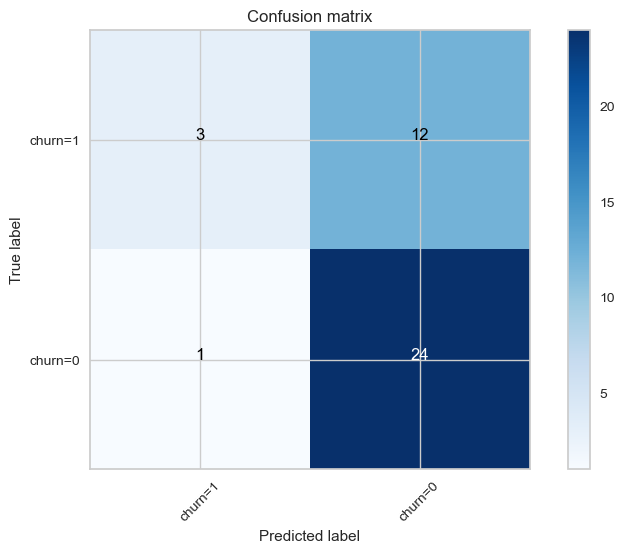

In [164]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yha, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [176]:
import matplotlib.pyplot as plt
def plt_confusion_matrix(metric,classes,title,normalize=False,cmap=plt.cm.Blues):
    plt.imshow(metric,interpolation='nearest',cmap=cmap)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    

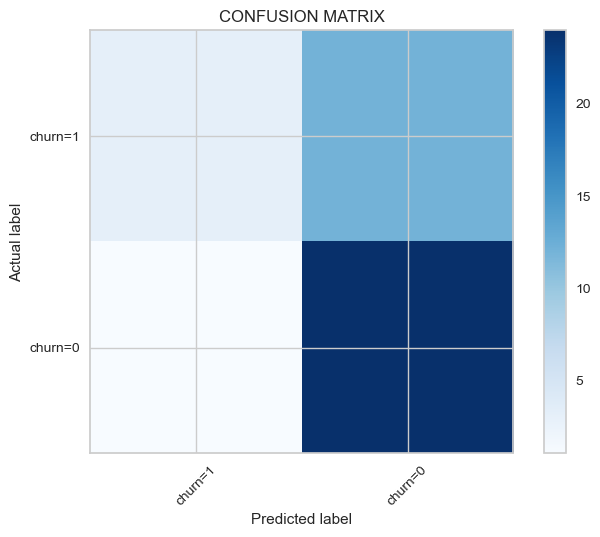

In [174]:
plt_confusion_matrix(con,classes=['churn=1','churn=0'],title='CONFUSION MATRIX',normalize=False)

Text(0.5, 1.0, 'Confusion matrix')

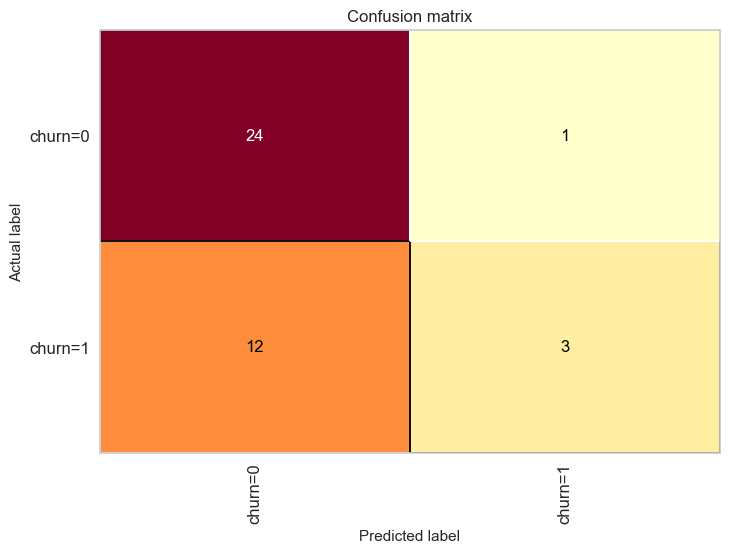

In [180]:
from yellowbrick.classifier import ConfusionMatrix
classes=[0,1]
cm=ConfusionMatrix(model,classes=['churn=0','churn=1'])
cm.fit(X_train,y_train)
cm.score(X_test,y_test)  #testing prediction
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
#plt.colorbar()
#tick_marks = np.arange(len(classes))
#plt.xticks(tick_marks, classes, rotation=45)
#plt.yticks(tick_marks,classes)

Let's look at first row. The first row is for customers whose actual churn value in the test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

This means, for 6 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes.  In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 


In [205]:
print(classification_report(y_test,yha))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.75      0.20      0.32        15

    accuracy                           0.68        40
   macro avg       0.71      0.58      0.55        40
weighted avg       0.70      0.68      0.61        40



In [207]:
from sklearn.metrics import log_loss
log_loss(y_test,yha1) #

0.5633358354764437

In [199]:
model2=LogisticRegression(C=0.01,solver='sag').fit(X_train,y_train)
yhaa=model2.predict_proba(X_test)

C:\Users\sivas\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [211]:
log_loss(y_test,yhaa) #Log loss quantifies how well our model achieves this balance between labels

0.6203109454344633